In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics import fbeta_score, precision_score, make_scorer, average_precision_score
from sklearn.svm import SVC

In [3]:
import cv2
rescaled_dim = 100

In [4]:
df = pd.read_csv("ml_facedata_camera_ready.csv")
df.head()

filename orientation gender        emotion  beard moustache glasses  \
0  02/DSC_0092.JPG       front   male          smile  light        no      no   
1  02/DSC_0093.JPG       front   male       surprise  light        no      no   
2  02/DSC_0094.JPG       front   male  surprise_open  light        no      no   
3  02/DSC_0095.JPG       front   male        neutral  light        no      no   
4  02/DSC_0096.JPG       front   male            sad  light        no      no   

    hair cloth 1 cloth 2  
0  dense      ms    none  
1  dense      ms    none  
2  dense      ms    none  
3  dense      ms    none  
4  dense      ms    none

In [5]:
df['new_beard'] = df['beard'].apply(lambda x: "light_beard" if x=='light' else x)
df['new_beard'] = df['new_beard'].apply(lambda x: "heavy" if x=='dense' else x)

df['new_beard'] = df['new_beard'].apply(lambda x: "none" if 'none' in x else x)
df['new_moustache'] = df['moustache'].apply(lambda x: "no_moustache" if x=='no' else "yes_moustache")
df['new_glasses'] = df['glasses'].apply(lambda x: "no_glasses" if x=='no' else "yes_glasses")
df['new_hair'] = df['hair'].apply(lambda x: "light_hair" if x=='light' else x)
df['new_cloth2'] = df['cloth 2'].apply(lambda x: "none-upper" if x=='none' else x)
df['new_cloth1'] = df['cloth 1'].apply(lambda x: "none-inner" if x=='none' else x)

In [6]:
df['new_beard'].value_counts()

light_beard    848
none           792
heavy          288
Name: new_beard, dtype: int64

In [7]:
df['comb'] = df['orientation']+" "+ df['gender'] +" "+ df['emotion'] +" "+ df['new_beard'] +" "+ df['new_moustache'] +" "+ df['new_glasses'] +" "+ df['new_hair'] +" "+ df['new_cloth1']+" "+df['new_cloth2']

In [8]:
df['split_tags'] = df['comb'].map(lambda row: row.split(" "))
lb = MultiLabelBinarizer()
y = lb.fit_transform(df['split_tags'])

In [9]:
y.shape
base = "../expressions_clean/"
X = np.squeeze(np.array([cv2.resize(plt.imread(base+name), (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR).reshape(1, -1) for name in df['filename'].values]))

In [10]:
print(X.shape, y.shape, lb.classes_)

(1928, 30000) (1928, 29) ['dense' 'down' 'female' 'front' 'ftop' 'heavy' 'hoodie' 'jacket'
 'light_beard' 'light_hair' 'male' 'ms' 'mtee' 'neutral' 'no_glasses'
 'no_moustache' 'none' 'none-inner' 'none-upper' 'polo' 'sad' 'smile'
 'surprise' 'surprise_open' 'sweater' 'up' 'yawning' 'yes_glasses'
 'yes_moustache']


In [11]:
print(X.shape, y.shape, lb.classes_)

(1928, 30000) (1928, 29) ['dense' 'down' 'female' 'front' 'ftop' 'heavy' 'hoodie' 'jacket'
 'light_beard' 'light_hair' 'male' 'ms' 'mtee' 'neutral' 'no_glasses'
 'no_moustache' 'none' 'none-inner' 'none-upper' 'polo' 'sad' 'smile'
 'surprise' 'surprise_open' 'sweater' 'up' 'yawning' 'yes_glasses'
 'yes_moustache']


In [25]:
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=20/107, shuffle=False)

In [53]:
X_train.shape
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
# pca = PCA(n_components=500)
# X_train=pca.fit_transform(X_train_o)
# sum(pca.explained_variance_ratio_)

In [46]:
X_train.shape

(1567, 500)

In [47]:
clf = OneVsRestClassifier(LogisticRegression(C=10, penalty='l2'))

In [48]:
clf.fit(X_train, y_train)


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [49]:
X_test = pca.transform(X_test_o)

In [50]:
score = fbeta_score(y_test, clf.predict(X_test), beta=.1, average=None)
avg_sample_score = fbeta_score(y_test, clf.predict(X_test), beta=1, average='samples')
print('Average F1 test score {}'.format(avg_sample_score))
# print('normal score', score)


Average F1 test score 0.5198203762851421


In [51]:
# per_label_f_beta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=.1, average=None)

instance_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='samples')
micro_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='micro')
macro_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='macro')

instance_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='samples')
micro_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='micro')
macro_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='macro')

hamming_loss = sklearn.metrics.hamming_loss(y_test,clf.predict(X_test) )
zero_one_loss = sklearn.metrics.zero_one_loss(y_test,clf.predict(X_test))
coverage_loss = sklearn.metrics.coverage_error(y_test,clf.predict(X_test))


In [21]:
#old

print(instance_fbeta, micro_fbeta, macro_fbeta, hamming_loss, zero_one_loss, coverage_loss)
print( instance_AUC, micro_AUC, macro_AUC)

0.6051599874929893 0.6028708133971292 0.4043317496994732 0.23784506638647435 1.0 28.94736842105263
0.7125346260387813 0.7125346260387811 0.6089110809827251


In [52]:
#new

print(instance_fbeta, micro_fbeta, macro_fbeta, hamming_loss, zero_one_loss, coverage_loss)
print( instance_AUC, micro_AUC, macro_AUC)

0.5198203762851421 0.5182697474476087 0.4343095788709054 0.34253510363931605 0.997229916897507 28.900277008310248
0.6399353647276085 0.6399353647276085 0.6131843226531878


In [65]:
def get_scores(X_train_o, X_test_o, y_train, y_test, dim, n_com, clf_t):
    if dim=='pca':
        dr = PCA(n_components=n_com)
        X_train=dr.fit_transform(X_train_o)
    else:
        dr = LatentDirichletAllocation(n_components=n_com, random_state=0)
        X_train=dr.fit_transform(X_train_o)
    
    if clf_t=='lr':
        clf = OneVsRestClassifier(LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=500))
    else:
        clf = OneVsRestClassifier(SVC())
    
    clf.fit(X_train, y_train)
    X_test = dr.transform(X_test_o)
    
    instance_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='samples')
    micro_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='micro')
    macro_fbeta = sklearn.metrics.fbeta_score(y_test, clf.predict(X_test), beta=1, average='macro')

    instance_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='samples')
    micro_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='micro')
    macro_AUC = sklearn.metrics.roc_auc_score(y_test, clf.predict(X_test), average='macro')

    hamming_loss = sklearn.metrics.hamming_loss(y_test,clf.predict(X_test) )
    zero_one_loss = sklearn.metrics.zero_one_loss(y_test,clf.predict(X_test))
    coverage_loss = sklearn.metrics.coverage_error(y_test,clf.predict(X_test))
    
    print(dim, clf_t)
    print(instance_fbeta, micro_fbeta, macro_fbeta, hamming_loss, zero_one_loss, coverage_loss)
    print( instance_AUC, micro_AUC, macro_AUC)
    
    
        

In [66]:
get_scores(X_train_o, X_test_o, y_train, y_test,'pca', 100, 'lr')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

pca lr
0.5866258477925845 0.5862186014935505 0.3670456153822531 0.23287802082338332 1.0 29.0
0.7023391812865496 0.7023391812865497 0.6047345264460634


In [67]:
get_scores(X_train_o, X_test_o, y_train, y_test,'lda', 100, 'lr')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


lda lr
0.5475686566977099 0.549576115001843 0.2590112495497194 0.23345114146527843 1.0 29.0
0.6819482917820868 0.6819482917820867 0.5363579351155771


In [68]:
get_scores(X_train_o, X_test_o, y_train, y_test,'lda', 100, 'svm')

KeyboardInterrupt: 

In [13]:
clfsvm = OneVsRestClassifier(SVC())

In [14]:
clfsvm.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto_deprecated',
                                  kernel='rbf', max_iter=-1, probability=False,
                                  random_state=None, shrinking=True, tol=0.001,
                                  verbose=False),
                    n_jobs=None)

In [15]:
instance_fbeta = sklearn.metrics.fbeta_score(y_test, clfsvm.predict(X_test), beta=1, average='samples')
micro_fbeta = sklearn.metrics.fbeta_score(y_test, clfsvm.predict(X_test), beta=1, average='micro')
macro_fbeta = sklearn.metrics.fbeta_score(y_test, clfsvm.predict(X_test), beta=1, average='macro')

instance_AUC = sklearn.metrics.roc_auc_score(y_test, clfsvm.predict(X_test), average='samples')
micro_AUC = sklearn.metrics.roc_auc_score(y_test, clfsvm.predict(X_test), average='micro')
macro_AUC = sklearn.metrics.roc_auc_score(y_test, clfsvm.predict(X_test), average='macro')

hamming_loss = sklearn.metrics.hamming_loss(y_test,clfsvm.predict(X_test) )
zero_one_loss = sklearn.metrics.zero_one_loss(y_test,clfsvm.predict(X_test))
coverage_loss = sklearn.metrics.coverage_error(y_test,clfsvm.predict(X_test))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print(instance_fbeta, micro_fbeta, macro_fbeta, hamming_loss, zero_one_loss, coverage_loss)
print( instance_AUC, micro_AUC, macro_AUC)

#old

0.5087719298245614 0.5087719298245614 0.14187340285997696 0.24561403508771928 1.0 24.0
0.6611842105263158 0.6611842105263157 0.5


In [16]:
print(instance_fbeta, micro_fbeta, macro_fbeta, hamming_loss, zero_one_loss, coverage_loss)
print( instance_AUC, micro_AUC, macro_AUC)

#new

0.46196462816961426 0.4619646281696143 0.11638037107667273 0.24118827013086255 1.0 29.0
0.641889812249923 0.641889812249923 0.5


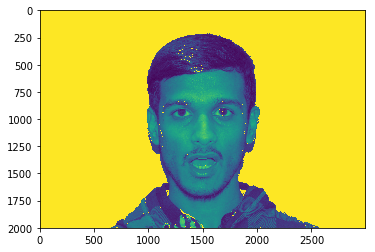

In [101]:
img = cv2.imread(df['filename'][994], 0)
plt.imshow(img)
plt.show()



In [102]:
ans = clf.predict(np.array([X_test[30]]))[0]
for i, j in enumerate(ans):
    print(lb.classes_[i]," ", j, y_test[30][i])


   0 0
dense   1 1
down   0 0
female   0 0
front   1 1
ftee   0 0
ftop   0 0
heavy   0 0
light_beard   1 1
light_hair   0 0
male   1 1
ms   1 0
mtee   0 1
neutral   0 0
no_glasses   1 1
no_moustache   0 0
none   0 0
sad   1 0
smile   0 0
surprise   1 0
surprise_open   1 1
up   0 0
yawning   0 0
yes_glasses   0 0
yes_moustache   1 1


In [113]:
a=pd.DataFrame(y_test[572:], columns = lb.classes_)
a.shape

(392, 25)

In [112]:
a.describe()

dense        down      female       front        ftee  \
count  392.0  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     0.0    0.862245    0.336735    0.183673    0.326531    0.045918   
std      0.0    0.345083    0.473197    0.387713    0.469543    0.209576   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    1.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.0    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.0    1.000000    1.000000    0.000000    1.000000    0.000000   
max      0.0    1.000000    1.000000    1.000000    1.000000    1.000000   

             ftop       heavy  light_beard  light_hair      ...        \
count  392.000000  392.000000   392.000000  392.000000      ...         
mean     0.137755    0.137755     0.321429    0.137755      ...         
std      0.345083    0.345083     0.467622    0.345083      ...         
min      0.000000    0.000000     0.000000    0.000000      ...         
25%      0.000000    0.000000     0.000000    0.000000      ...         
50%      0.000000    0.000000     0.000000    0.000000      ...         
75%      0.000000    0.000000     1.000000    0.000000      ...         
max      1.000000    1.000000     1.000000    1.000000      ...         

       no_moustache        none         sad       smile    surprise  \
count    392.000000  392.000000  392.000000  392.000000  392.000000   
mean       0.505102    0.540816    0.168367    0.165816    0.165816   
std        0.500613    0.498968    0.374670    0.372391    0.372391   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.000000    0.000000    0.000000    0.000000    0.000000   
50%        1.000000    1.000000    0.000000    0.000000    0.000000   
75%        1.000000    1.000000    0.000000    0.000000    0.000000   
max        1.000000    1.000000    1.000000    1.000000    1.000000   

       surprise_open          up     yawning  yes_glasses  yes_moustache  
count     392.000000  392.000000  392.000000   392.000000     392.000000  
mean        0.165816    0.336735    0.168367     0.045918       0.494898  
std         0.372391    0.473197    0.374670     0.209576       0.500613  
min         0.000000    0.000000    0.000000     0.000000       0.000000  
25%         0.000000    0.000000    0.000000     0.000000       0.000000  
50%         0.000000    0.000000    0.000000     0.000000       0.000000  
75%         0.000000    1.000000    0.000000     0.000000       1.000000  
max         1.000000    1.000000    1.000000     1.000000       1.000000  

[8 rows x 25 columns]

<Figure size 432x288 with 0 Axes>

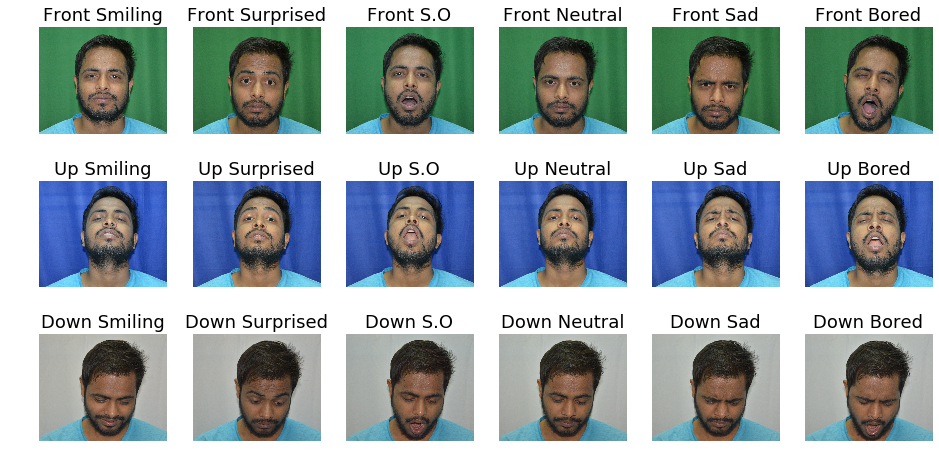

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import glob
import cv2
image_data = glob.glob("../expressions/04/*.JPG")

image_data.sort()
image_data
x, y = 6, 3
plt.subplots_adjust(left=0, bottom=0, top=0.1,right=0.1)
f, axarr = plt.subplots(y,x)
a=['Front', 'Up', 'Down']
b = ['Smiling', 'Surprised', 'S.O', 'Neutral', 'Sad', 'Bored']
f.set_figheight(8)
f.set_figwidth(16)
for i in range(len(image_data)):
    w = i//6
    h = i%6
    img = cv2.imread(image_data[i])
    img = img[:, 300:-300, ::-1]
    axarr[w,h].imshow(img)
    axarr[w,h].axis('off')
    axarr[w, h].set_title(a[w]+" "+b[h], fontsize=18)

# plt.show()

../expressions_test/107/DSC_0205.JPG
../expressions/05/DSC_0236.JPG
../expressions/02/DSC_0092.JPG
../expressions/04/DSC_0183.JPG
../expressions/27/DSC_0160.JPG
../expressions/29/DSC_0250.JPG
../expressions_test/94/DSC_0621.JPG
../expressions/52/DSC_0286.JPG
../expressions/85/DSC_0211.JPG
../expressions_test/102/DSC_0983.JPG
../expressions/07/DSC_0326.JPG
../expressions/73/DSC_0208.JPG
../expressions/66/DSC_0924.JPG
../expressions/67/DSC_0970.JPG
../expressions_test/106/DSC_0160.JPG
../expressions_test/100/DSC_0892.JPG


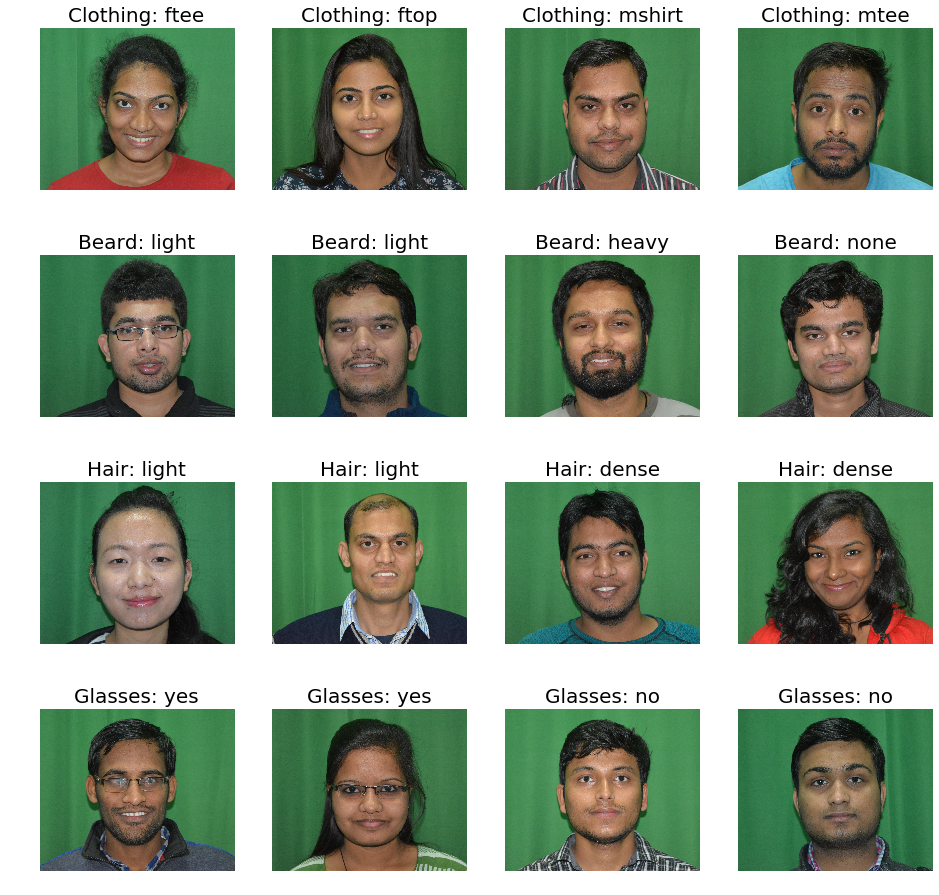

In [5]:
y, x = 4, 4
img_data=[['../expressions_test/107/DSC_0205.JPG'], ['../expressions/05/DSC_0236.JPG'],['../expressions/02/DSC_0092.JPG'], ['../expressions/04/DSC_0183.JPG'],          ['../expressions/27/DSC_0160.JPG'], ['../expressions/29/DSC_0250.JPG'], ['../expressions_test/94/DSC_0621.JPG'], ['../expressions/52/DSC_0286.JPG'],          ['../expressions/85/DSC_0211.JPG'],['../expressions_test/102/DSC_0983.JPG'], ['../expressions/07/DSC_0326.JPG'], ['../expressions/73/DSC_0208.JPG'],          ['../expressions/66/DSC_0924.JPG'], ['../expressions/67/DSC_0970.JPG'], ['../expressions_test/106/DSC_0160.JPG'], ['../expressions_test/100/DSC_0892.JPG']]
titles = ['Clothing: ftee', 'Clothing: ftop', 'Clothing: mshirt', 'Clothing: mtee', 'Beard: light', 'Beard: light', 'Beard: heavy', 'Beard: none', 'Hair: light', 'Hair: light', 'Hair: dense', 'Hair: dense', 'Glasses: yes', 'Glasses: yes', 'Glasses: no', 'Glasses: no']
f, axarr = plt.subplots(y,x)
f.set_figheight(16)
f.set_figwidth(16)
for i in range(len(img_data)):
    w = i//4
    h = i%4
    print(img_data[i][0])
    img = cv2.imread(img_data[i][0])
    img = img[:, 300:-300, ::-1]
    axarr[w,h].imshow(img)
    axarr[w,h].axis('off')
    axarr[w,h].set_title(titles[i], fontsize=20)

../expressions_test/107/DSC_0205.JPG
../expressions/05/DSC_0236.JPG
../expressions/02/DSC_0092.JPG
../expressions/04/DSC_0183.JPG
../expressions/27/DSC_0160.JPG
../expressions/29/DSC_0250.JPG
../expressions_test/94/DSC_0621.JPG
../expressions/52/DSC_0286.JPG
../expressions/85/DSC_0211.JPG
../expressions_test/102/DSC_0983.JPG
../expressions/07/DSC_0326.JPG
../expressions/73/DSC_0208.JPG
../expressions/66/DSC_0924.JPG
../expressions/67/DSC_0970.JPG
../expressions_test/106/DSC_0160.JPG
../expressions_test/100/DSC_0892.JPG


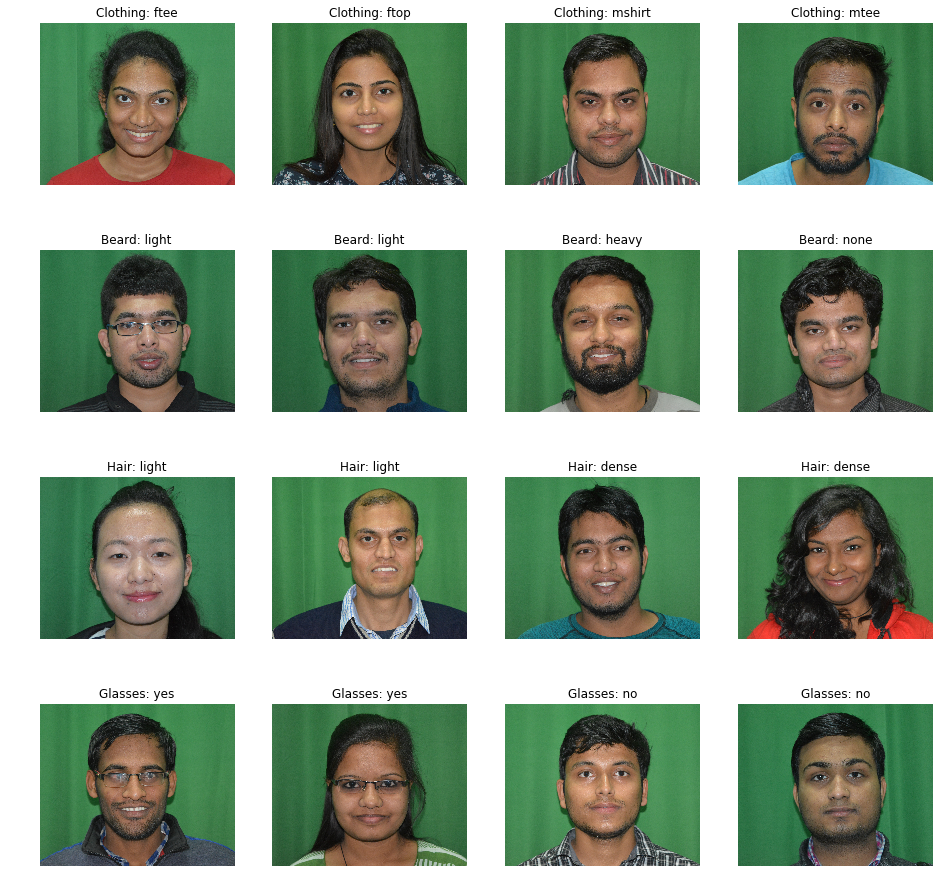

In [7]:
y, x = 4, 4
img_data=[['../expressions_test/107/DSC_0205.JPG'], ['../expressions/05/DSC_0236.JPG'],['../expressions/02/DSC_0092.JPG'], ['../expressions/04/DSC_0183.JPG'],          ['../expressions/27/DSC_0160.JPG'], ['../expressions/29/DSC_0250.JPG'], ['../expressions_test/94/DSC_0621.JPG'], ['../expressions/52/DSC_0286.JPG'],          ['../expressions/85/DSC_0211.JPG'],['../expressions_test/102/DSC_0983.JPG'], ['../expressions/07/DSC_0326.JPG'], ['../expressions/73/DSC_0208.JPG'],          ['../expressions/66/DSC_0924.JPG'], ['../expressions/67/DSC_0970.JPG'], ['../expressions_test/106/DSC_0160.JPG'], ['../expressions_test/100/DSC_0892.JPG']]
titles = ['Clothing: ftee', 'Clothing: ftop', 'Clothing: mshirt', 'Clothing: mtee', 'Beard: light', 'Beard: light', 'Beard: heavy', 'Beard: none', 'Hair: light', 'Hair: light', 'Hair: dense', 'Hair: dense', 'Glasses: yes', 'Glasses: yes', 'Glasses: no', 'Glasses: no']
f, axarr = plt.subplots(y,x)
f.set_figheight(16)
f.set_figwidth(16)
for i in range(len(img_data)):
    w = i//4
    h = i%4
    print(img_data[i][0])
    img = cv2.imread(img_data[i][0])
    img = img[:, 300:-300, ::-1]
    axarr[w,h].imshow(img)
    axarr[w,h].axis('off')
    axarr[w,h].set_title(titles[i])

../expressions/107/DSC_0205.JPG


TypeError: 'NoneType' object is not subscriptable

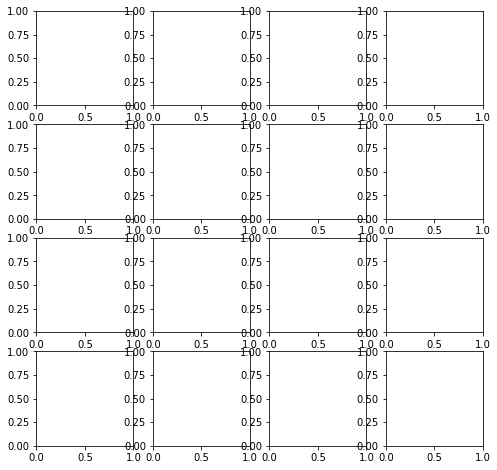

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


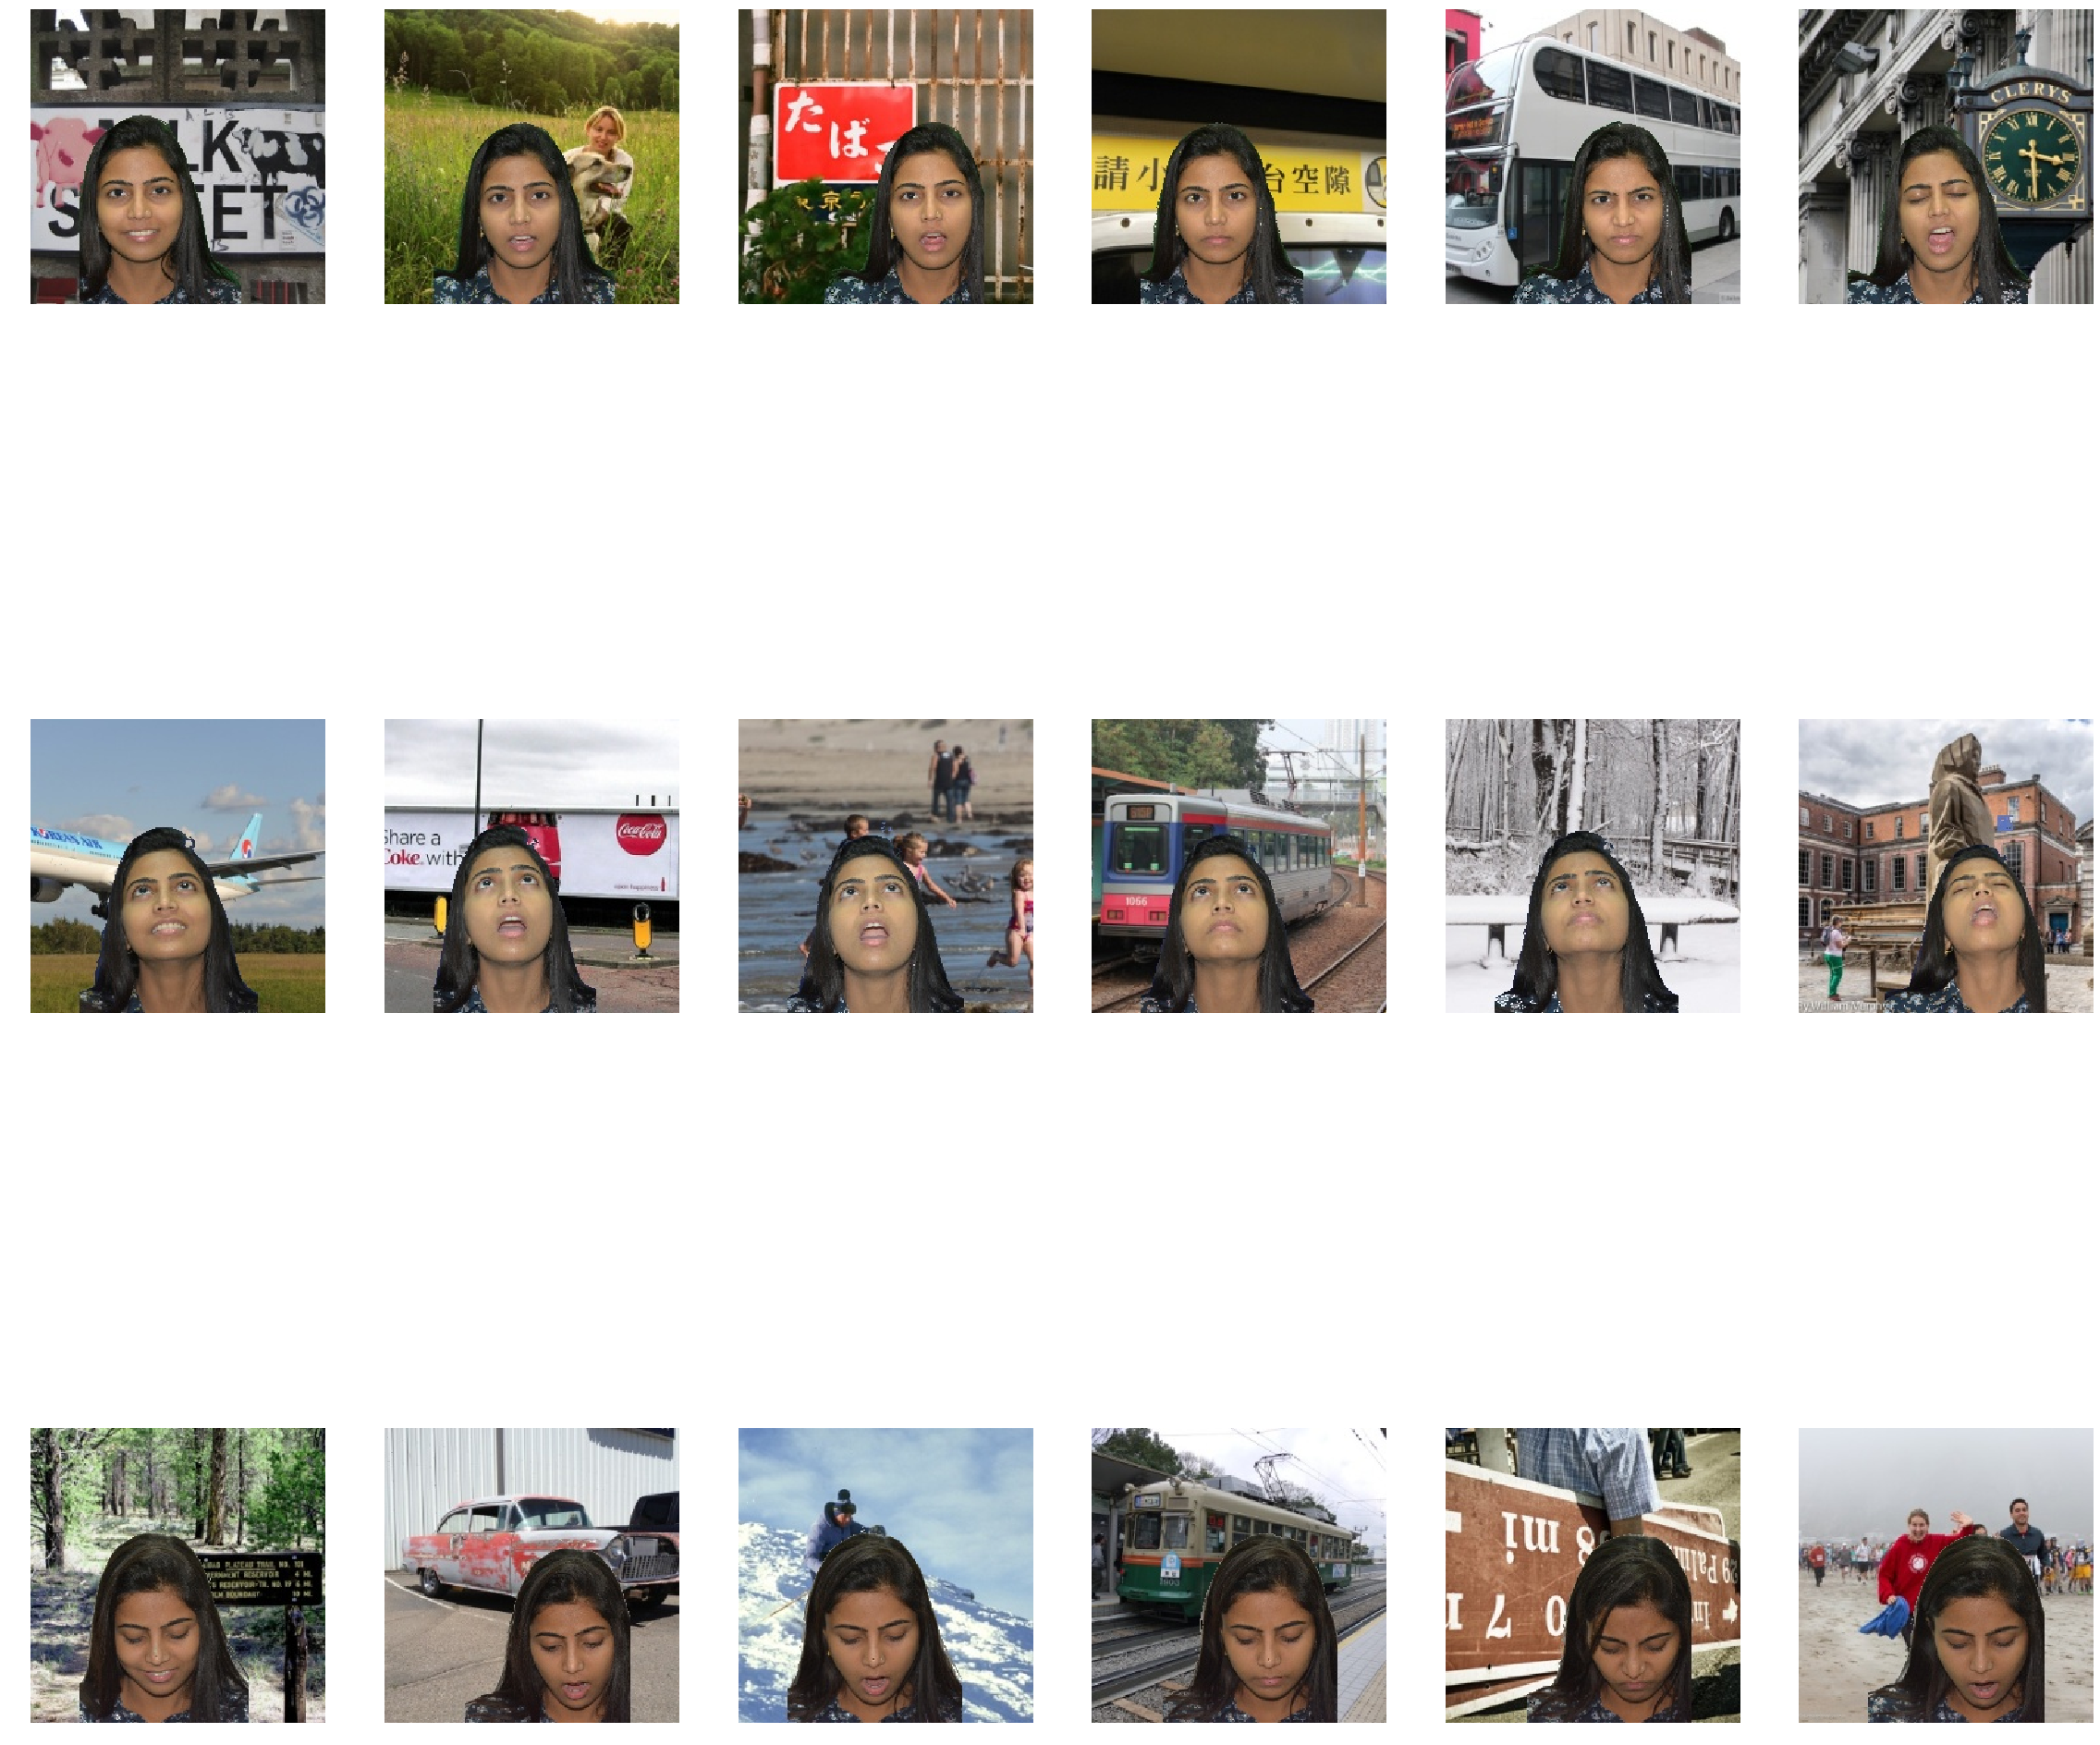

In [21]:
from matplotlib import pyplot as plt
import cv2
y, x = 3, 6
# img_data=[['../expressions_test/107/DSC_0205.JPG'], ['../expressions/05/DSC_0236.JPG'],['../expressions/02/DSC_0092.JPG'], ['../expressions/04/DSC_0183.JPG'],          ['../expressions/27/DSC_0160.JPG'], ['../expressions/29/DSC_0250.JPG'], ['../expressions_test/94/DSC_0621.JPG'], ['../expressions/52/DSC_0286.JPG'],          ['../expressions/85/DSC_0211.JPG'],['../expressions_test/102/DSC_0983.JPG'], ['../expressions/07/DSC_0326.JPG'], ['../expressions/73/DSC_0208.JPG'],          ['../expressions/66/DSC_0924.JPG'], ['../expressions/67/DSC_0970.JPG'], ['../expressions_test/106/DSC_0160.JPG'], ['../expressions_test/100/DSC_0892.JPG']]
b = '/media/petrichor/data/expressions_clean_aug_small_print/05/'
img_data = [[b+'DSC_0'+str(i)+'.JPG'] for i in range(236, 254)]
img_data
# titles = ['Clothing: ftee', 'Clothing: ftop', 'Clothing: mshirt', 'Clothing: mtee', 'Beard: light', 'Beard: light', 'Beard: heavy', 'Beard: none', 'Hair: light', 'Hair: light', 'Hair: dense', 'Hair: dense', 'Glasses: yes', 'Glasses: yes', 'Glasses: no', 'Glasses: no']
f, axarr = plt.subplots(y,x)
f.set_figheight(40)
f.set_figwidth(40)
for i in range(len(img_data)):
    w = i//6
    h = i%6
    img = cv2.imread(img_data[i][0])
    print(img.shape)
    img = img[:, :, ::-1]
    axarr[w,h].imshow(img)
    axarr[w,h].axis('off')
#     axarr[w,h].set_title(titles[i])
plt.savefig('testplot.png')